$$\require{mhchem}$$

# Curve fitting with two species and multiple data (20 pt)

Consider the irreversible reaction:
\begin{align*}
\ce{A + B -> Products}
\end{align*}
with $r=kC_A^nC_B^m$ taking place in an isothermal liquid-phase batch reactor. Measurements of $C_A$ vs $C_B$ are included in the attached file HW6_p1_data.dat. We wish to determine from the data the rate constant and the order of the reaction with respect to A and B.  We have data from two experiments. 

## Load the data from the file into a numpy array and plot the concentration of each species

You can use either the csv library https://docs.python.org/3/library/csv.html or pandas https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html. 

The first column is time in minutes. The second and third column is C_A and C_B for the first experiment (in mol/L). The fourth and fifth column is C_A and C_B for the second experiment. Plot the data for $C_A$ and $C_B$ for each experiment (one experiment per figure).

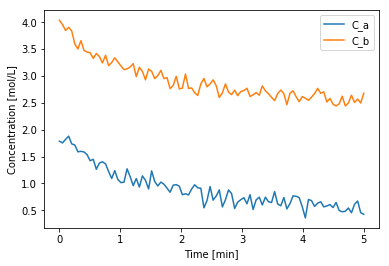

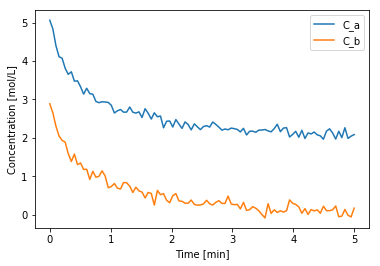

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
exp_data = pd.read_csv('HW6_p1_data.dat', delim_whitespace=True,names=['t','Ca1','Cb1','Ca2','Cb2'])

plt.plot(exp_data['t'],exp_data[['Ca1','Cb1']])
plt.legend(['C_a','C_b'])
plt.xlabel('Time [min]')
plt.ylabel('Concentration [mol/L]')
plt.show()

plt.plot(exp_data['t'],exp_data[['Ca2','Cb2']])
plt.legend(['C_a','C_b'])
plt.xlabel('Time [min]')
plt.ylabel('Concentration [mol/L]')
plt.show()


## Estimate rate parameters $k, n, m$ and initial concentration $C_{A0},C_{B0}$ from the data in the first experiment using a numerical solution for the concentrations of each species (standard mol balance + odeint).  Plot the final fit of the experiment along with the experimental data and calculate the uncertainty in each value

/opt/conda/lib/python3.6/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


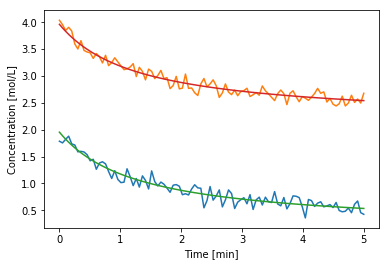

[ 2.00784483  3.00202615 -1.73592423  1.95367674  3.96036575]
[0.1151145  0.06296482 0.0717789  0.03283386 0.0333336 ]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt


In [14]:
from scipy.integrate import odeint
import numpy as np
from scipy.optimize import minimize

def batch_mol_balance(C,t,k,n,m):
    Ca,Cb=C
    r = k*Ca**n*Cb**m
    dCadt=-r
    dCbdt=-r
    return [dCadt,dCbdt]

def solve_batch(t,k,n,m,Ca0,Cb0):
    sol = odeint(batch_mol_balance,[Ca0,Cb0],t,args=(k,n,m))
    return sol

def mse(x):
    k,n,m,Ca0,Cb0 = x
    sol = solve_batch(exp_data['t'],k,n,m,Ca0,Cb0)
    squared_error = (exp_data['Ca1']-sol[:,0])**2. + (exp_data['Cb1']-sol[:,1])**2.
    return 1/2*np.sum(squared_error)

def uncertainty(min_out,num_samples):
    return np.diag(np.sqrt(min_out['hess_inv']*2*min_out.fun/(num_samples-5)))
    
min_out = minimize(mse,[1,3,2,2,4])

plt.plot(exp_data['t'],exp_data[['Ca1','Cb1']])
plt.plot(exp_data['t'],solve_batch(exp_data['t'],*min_out.x))
plt.xlabel('Time [min]')
plt.ylabel('Concentration [mol/L]')
plt.show()

print(min_out.x)
print(uncertainty(min_out,len(exp_data['t'])*2))

## Consider the second experiment, estimate the parameters using only this data. Comment on how the values and confidence intervals are different than the first case


/opt/conda/lib/python3.6/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


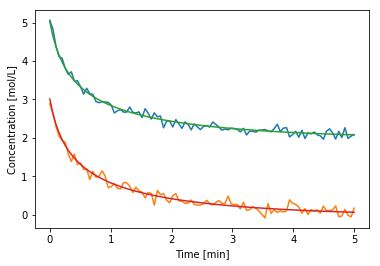

[0.03366434 2.96709985 0.69637602 5.02286971 3.01201237]
[0.01691567 0.43739957 0.13696535 0.05036335 0.0506292 ]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt


In [15]:
from scipy.integrate import odeint
import numpy as np
from scipy.optimize import minimize

def batch_mol_balance(C,t,k,n,m):
    Ca,Cb=C
    r = k*Ca**n*Cb**m
    dCadt=-r
    dCbdt=-r
    return [dCadt,dCbdt]

def solve_batch(t,k,n,m,Ca0,Cb0):
    sol = odeint(batch_mol_balance,[Ca0,Cb0],t,args=(k,n,m))
    return sol

def mse(x):
    k,n,m,Ca0,Cb0 = x
    sol = solve_batch(exp_data['t'],k,n,m,Ca0,Cb0)
    squared_error = (exp_data['Ca2']-sol[:,0])**2. + (exp_data['Cb2']-sol[:,1])**2.
    return 1/2*np.sum(squared_error)

def uncertainty(min_out,num_samples):
    return np.diag(np.sqrt(min_out['hess_inv']*2*min_out.fun/(num_samples-5)))
    
min_out = minimize(mse,[1,3,2,2,4])

plt.plot(exp_data['t'],exp_data[['Ca2','Cb2']])
plt.plot(exp_data['t'],solve_batch(exp_data['t'],*min_out.x))
plt.xlabel('Time [min]')
plt.ylabel('Concentration [mol/L]')
plt.show()

print(min_out.x)
print(uncertainty(min_out,len(exp_data['t'])*2))

## Estimate the parameters using both experiments simultaneously. Are the confidence intervals better? Comment on why or why not.

In [4]:
from scipy.integrate import odeint
import numpy as np
from scipy.optimize import minimize

def batch_mol_balance(C,t,k,n,m):
    Ca,Cb=C
    r = k*Ca**n*Cb**m
    dCadt=-r
    dCbdt=-r
    return [dCadt,dCbdt]

def solve_batch(t,k,n,m,Ca0,Cb0):
    sol = odeint(batch_mol_balance,[Ca0,Cb0],t,args=(k,n,m))
    return sol

def mse(x):
    k,n,m,Ca01,Cb01,Ca02,Cb02 = x
    sol = solve_batch(exp_data['t'],k,n,m,Ca01,Cb01)
    squared_error_1 = (exp_data['Ca1']-sol[:,0])**2. + (exp_data['Cb1']-sol[:,1])**2.
    sol = solve_batch(exp_data['t'],k,n,m,Ca02,Cb02)
    squared_error_2 = (exp_data['Ca2']-sol[:,0])**2. + (exp_data['Cb2']-sol[:,1])**2.
    return 1/2*(np.sum(squared_error_1)+np.sum(squared_error_2))

def uncertainty(min_out,num_samples):
    return np.diag(np.sqrt(min_out['hess_inv']*2*min_out.fun/(num_samples-5)))
    
min_out = minimize(mse,[1,3,2,2,4,3,5])

print(min_out.x)
print(uncertainty(min_out,len(exp_data['t'])*4))

/opt/conda/lib/python3.6/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


[0.09808216 2.03716079 0.98211274 1.96245614 3.96904098 4.98128283
 2.97344163]
[0.00330417 0.02881064 0.02229015 0.02758957 0.02755951 0.0452345
 0.04358719]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt


Confidence intervals are better because we have more data to fit/estimate.

## Based on these results, to determine the order of the rate expression with respect to two different species, how should you choose the initial conditions of the two species?

Choose initial conditions based on the result from 1.4

## Linear least squares. Derive an expression for the linear least squared fit for this data for $\ln(-dC_A/dt)$ and $\ln(-dC_B/dt)$, analagous to how we did it in https://github.com/zulissi/f18-06625/blob/master/rxns-book/parameter-estimation.ipynb

$$\frac{-dC_A}{dt}~=~\frac{-dC_B}{dt}~=~kC_A^nC_B^m$$
$$ln\frac{-dC_A}{dt}~=~ln\frac{-dC_B}{dt}~=~lnk~+~nln(C_A)~+~mln(C_B)$$

## Using the second set of data (without the noise) in HW6_p1_data_error_free.dat, estimate the derivative for each curve and fit $k, n, m$ for each of three cases:
- Just data from experiment 1
- Just data from experiment 2
- Data from experiment 1 and 2

You probably want to fit this by taking the average of these two estimates for the reaction rate, but you could also fit this by having the linear regression fit both curves at the same time (for example, fit the derivative of A and B as extra data). Include estimates of uncertainty in each parameter. You can use either derivate data from the polynomial-fit curve or the raw data using finite differences (as in class).

In [5]:
exp_data_nonoise = pd.read_csv('HW6_p1_data_error_free.dat', delim_whitespace=True,names=['t','Ca1','Cb1','Ca2','Cb2'])

dt = exp_data_nonoise['t'][1]
r1 = -np.gradient(exp_data_nonoise['Ca1'])/dt
r2 = -np.gradient(exp_data_nonoise['Cb1'])/dt
r_exp1 = (r1+r2)/2
X_exp1 = np.stack([np.log(exp_data_nonoise['Ca1']),np.log(exp_data_nonoise['Cb1']),r_exp1*0+1]).T

dt = exp_data_nonoise['t'][1]
r1 = -np.gradient(exp_data_nonoise['Ca2'])/dt
r2 = -np.gradient(exp_data_nonoise['Cb2'])/dt
r_exp2 = (r1+r2)/2
X_exp2 = np.stack([np.log(exp_data_nonoise['Ca2']),np.log(exp_data_nonoise['Cb2']),r_exp1*0+1]).T

In [6]:
from pycse import regress
regress(X_exp1,np.log(r_exp1),alpha=.05)

/opt/conda/lib/python3.6/site-packages/pycse/PYCSE.py:62: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = np.linalg.lstsq(A, y)


(array([ 2.03670323,  0.88120607, -2.17065481]),
 array([[ 2.01099041,  2.06241606],
        [ 0.80207485,  0.96033729],
        [-2.25884796, -2.08246166]]),
 array([0.01295367, 0.03986491, 0.04443015]))

In [7]:
regress(X_exp2,np.log(r_exp2),alpha=.05)

/opt/conda/lib/python3.6/site-packages/pycse/PYCSE.py:62: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = np.linalg.lstsq(A, y)


(array([ 1.93943009,  1.01103665, -2.23598983]),
 array([[ 1.89828154,  1.98057864],
        [ 1.00196665,  1.02010665],
        [-2.28259755, -2.1893821 ]]),
 array([0.02072991, 0.00456931, 0.02348015]))

In [8]:
regress(np.concatenate([X_exp1,X_exp2],axis=0),np.log(np.concatenate([r_exp1,r_exp2],axis=0)),alpha=.05)

/opt/conda/lib/python3.6/site-packages/pycse/PYCSE.py:62: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = np.linalg.lstsq(A, y)


(array([ 1.99761503,  0.99879522, -2.30184058]),
 array([[ 1.99459943,  2.00063063],
        [ 0.99724572,  1.00034473],
        [-2.30371874, -2.29996241]]),
 array([0.0015291 , 0.0007857 , 0.00095235]))

## Finally, using the noisy data in HW6_p1_data.dat, estimate the derivative for each curve and fit $k, n, m$ for each of three cases:
- Just data from experiment 1
- Just data from experiment 2
- Data from experiment 1 and 2


In [9]:

dt = exp_data['t'][1]

def get_dCdt(t,C):
    pCa = np.polyfit(t,C, 6)
    dCdt = np.polyval(np.polyder(pCa), t)
    return dCdt

dCa1dt = get_dCdt(exp_data['t'],exp_data['Ca1'])
dCa2dt = get_dCdt(exp_data['t'],exp_data['Ca2'])
dCb1dt = get_dCdt(exp_data['t'],exp_data['Cb1'])
dCb2dt = get_dCdt(exp_data['t'],exp_data['Cb2'])

r1 = -dCa1dt
r2 = -dCb1dt
r_exp1 = (r1+r2)/2
X_exp1 = np.stack([np.log(exp_data['Ca1']),np.log(exp_data['Cb1']),r_exp1*0+1]).T
X_exp1 = X_exp1[r_exp1>0]
r_exp1 = r_exp1[r_exp1>0]

r1 = -dCa2dt
r2 = -dCb2dt
r_exp2 = (r1+r2)/2
X_exp2 = np.stack([np.log(exp_data['Ca2']),np.log(exp_data['Cb2']),r_exp2*0+1]).T
bool_select = (r_exp2>0)&np.all(X_exp2>0,axis=1)
X_exp2 = X_exp2[bool_select]
r_exp2 = r_exp2[bool_select]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater


In [10]:
from pycse import regress
regress(X_exp1,np.log(r_exp1),alpha=.05)

/opt/conda/lib/python3.6/site-packages/pycse/PYCSE.py:62: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = np.linalg.lstsq(A, y)


(array([ 0.97862303,  4.27271125, -6.02227445]),
 array([[ 0.50552622,  1.45171985],
        [ 2.82028942,  5.72513307],
        [-7.63677765, -4.40777126]]),
 array([0.23830579, 0.73160614, 0.8132489 ]))

In [11]:
regress(X_exp2,np.log(r_exp2),alpha=.05)

/opt/conda/lib/python3.6/site-packages/pycse/PYCSE.py:62: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = np.linalg.lstsq(A, y)


(array([ 2.65280478,  0.52614233, -2.95314635]),
 array([[-0.43659873,  5.7422083 ],
        [-1.05265318,  2.10493783],
        [-6.26235804,  0.35606534]]),
 array([1.43003534, 0.73079912, 1.53178101]))

In [12]:
regress(np.concatenate([X_exp1,X_exp2],axis=0),np.log(np.concatenate([r_exp1,r_exp2],axis=0)),alpha=.05)

/opt/conda/lib/python3.6/site-packages/pycse/PYCSE.py:62: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = np.linalg.lstsq(A, y)


(array([ 2.0000603 ,  0.99138007, -2.36025274]),
 array([[ 1.86257805,  2.13754256],
        [ 0.68425136,  1.29850878],
        [-2.67038587, -2.0501196 ]]),
 array([0.06938741, 0.15500811, 0.15652445]))

## Which method of estimating parameters would you recommend in this situation?

In this situation, First method, because it does not require eliminating noise/unfit data. (Second method can be recommended in different situations where data does not contain noise, etc.)